In [67]:
from pyforest import *
import re
import inflect # convert numbers to words
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
review_data = pd.read_csv('reviews_Baby_5_final_dataset.csv')

In [3]:
review_data.head()

,reviewerID,asin,reviewerName,helpful,helpful_num,helpful_den,reviewText,overall,summary,unixReviewTime,reviewTime,exclamationcount,questioncount,charcount,wordcount,capcount,avgrating,diffrating,ishelpful
0,A3NMPMELAZC8ZY,097293751X,Jakell,"[3, 3]",3,3,This book is perfect! I'm a first time new mo...,5,Great for newborns,1359244800,"01 27, 2013",1,0,250,46,0,4.0,1.0,1
1,A3O4ATU0ENBKTU,097293751X,MAPN,"[1, 1]",1,1,I use this so that our babysitter (grandma) ca...,5,Compact and Easy way to record the milestones,1361836800,"02 26, 2013",0,0,734,148,0,4.0,1.0,1
2,A2SYNL4YX73KNY,097293751X,"R. Davidson ""Jrdpa""","[2, 2]",2,2,"I like this log, but think it would work bette...",3,Needs clearer AM & PM,1369008000,"05 20, 2013",0,0,288,59,2,4.0,1.0,1
3,A2Q2A6JKY95RTP,097293751X,R. Garrelts,"[2, 2]",2,2,My wife and I have a six month old baby boy an...,3,Expensive and Somewhat Limited Format,1381968000,"10 17, 2013",0,0,2959,505,9,4.0,1.0,1
4,A21I33AWNOWMK8,9729375011,EmilyS,"[1, 2]",1,2,I have used this book since my son was born. ...,5,Great product!,1364256000,"03 26, 2013",0,0,595,117,0,4.5,0.5,0


In [4]:
review_data = review_data[['reviewText']]

In [5]:
review_data.head()

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...


In [6]:
review_data = review_data[:6]

In [7]:
review_data

,reviewText
0,This book is perfect! I'm a first time new mo...
1,I use this so that our babysitter (grandma) ca...
2,"I like this log, but think it would work bette..."
3,My wife and I have a six month old baby boy an...
4,I have used this book since my son was born. ...
5,THis has been helpful in tracking the feedings...


In [8]:
review_data.shape

(6, 1)

In [9]:
documents = list(review_data['reviewText'])

In [10]:
documents[0]

"This book is perfect!  I'm a first time new mom, and this book made it so easy to keep track of feedings, diaper changes, sleep.  Definitely would recommend this for new moms.  Plus it's small enough that I throw in the diaper back for doctor visits."

In [12]:
document_tokens = []

for document in documents:
    tokenize_word = word_tokenize(document)
    
    document_tokens.append(tokenize_word)

In [15]:
print(document_tokens[0])

['This', 'book', 'is', 'perfect', '!', 'I', "'m", 'a', 'first', 'time', 'new', 'mom', ',', 'and', 'this', 'book', 'made', 'it', 'so', 'easy', 'to', 'keep', 'track', 'of', 'feedings', ',', 'diaper', 'changes', ',', 'sleep', '.', 'Definitely', 'would', 'recommend', 'this', 'for', 'new', 'moms', '.', 'Plus', 'it', "'s", 'small', 'enough', 'that', 'I', 'throw', 'in', 'the', 'diaper', 'back', 'for', 'doctor', 'visits', '.']


In [16]:
print(document_tokens[2])

['I', 'like', 'this', 'log', ',', 'but', 'think', 'it', 'would', 'work', 'better', 'with', 'clearer', 'AM', '&', 'PM', 'sections', '.', 'Each', 'page', 'is', '12', 'hours', 'so', 'you', 'really', 'need', 'two', 'pages', 'a', 'day', 'if', 'your', 'baby', 'feeds', 'or', 'wets', 'a', 'lot', 'in', 'the', 'early', 'morning', 'hours', 'between', 'midnight', 'and', '7am', '.', 'We', "'re", 'cramming', 'those', 'in', 'to', 'the', '2', 'blank', 'spaces', 'above', '7am', 'right', 'now', '.']


In [22]:
fdist = FreqDist(document_tokens[0])

In [23]:
fdist.most_common(15)

[(',', 3),
 ('.', 3),
 ('book', 2),
 ('I', 2),
 ('new', 2),
 ('this', 2),
 ('it', 2),
 ('diaper', 2),
 ('for', 2),
 ('This', 1),
 ('is', 1),
 ('perfect', 1),
 ('!', 1),
 ("'m", 1),
 ('a', 1)]

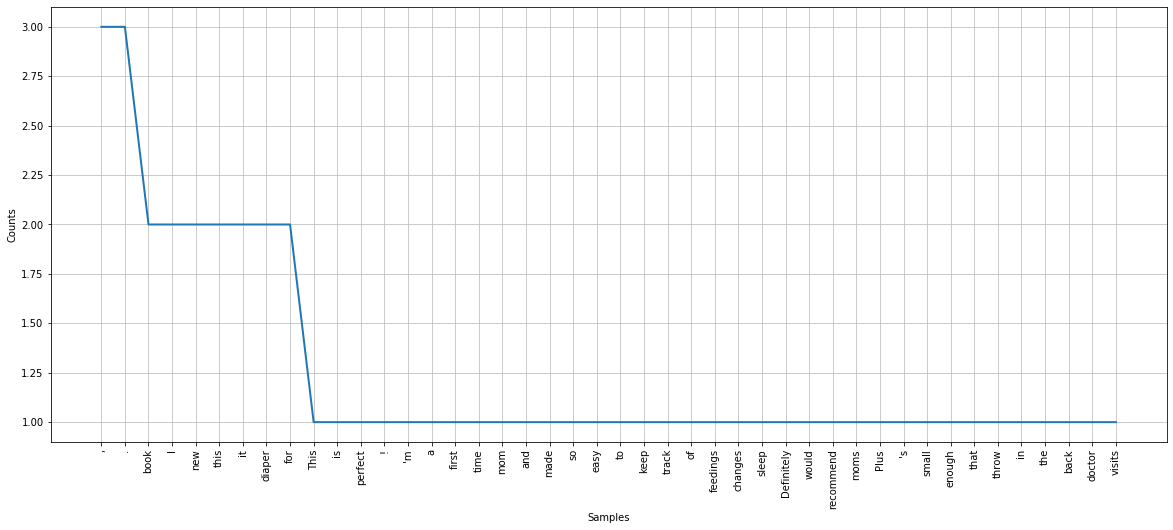

In [27]:
plt.figure(figsize=(20,8))
fdist.plot(cumulative = False)
plt.show()

In [29]:
def to_lowercase(documents):
    documents_list = []
    
    for document in documents:
        new_word = document.lower()
        
        documents_list.append(new_word)
        
    return documents_list

In [31]:
def remove_punctuation(documents):
    documents_list = []
    
    for document in documents:
        
        new_word = re.sub('[^\w\s]', '', document)
        
        if new_word != '':
            documents_list.append(new_word)
            
    return documents_list

In [35]:
def replace_numbers(documents):
    documents_list = []
    
    inf_engine = inflect.engine()
    
    for document in documents:
        
        final_word_list = []
        
        words = document.split()
        
        for word in words:
            
            if word.isdigit():
                
                final_word_list.append(inf_engine.number_to_words(word))
                
            else:
                
                final_word_list.append(word)
                
        documents_list.append(' '.join(final_word_list))
    
    return documents_list

In [36]:
def lemmatize_verbs(documents):
    
    lemmatizer = WordNetLemmatizer()
    
    documents_list = []
    
    for document in documents:
        
        final_word_list = []
        
        words = document.split()
        
        for word in words:
            
            final_word_list.append(lemmatizer.lemmatize(word, pos = 'v'))
            
        documents_list.append(' '.join(final_word_list))
        
    return documents_list

In [37]:
def normalization(documents):
    
    documents = to_lowercase(documents)
    
    documents = remove_punctuation(documents)
    
    documents = replace_numbers(documents)
    
    documents = lemmatize_verbs(documents)
    
    return documents

In [38]:
lower_case_docs = to_lowercase(documents)

lower_case_docs[2]

"i like this log, but think it would work better with clearer am & pm sections. each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am. we're cramming those in to the 2 blank spaces above 7am right now."

In [40]:
punc_removed_docs = remove_punctuation(lower_case_docs)

punc_removed_docs[2]

'i like this log but think it would work better with clearer am  pm sections each page is 12 hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the 2 blank spaces above 7am right now'

In [41]:
nums_replaced_docs = replace_numbers(punc_removed_docs)

nums_replaced_docs[2]

'i like this log but think it would work better with clearer am pm sections each page is twelve hours so you really need two pages a day if your baby feeds or wets a lot in the early morning hours between midnight and 7am were cramming those in to the two blank spaces above 7am right now'

In [42]:
documents = normalization(documents)

In [45]:
documents[1]

'i use this so that our babysitter grandma can keep track of what go on during the day weve record so many milestones since we receive this it be a six month diary and have room for note i wish the hours start around six be and go until eight pm but we just write over certain time to suit our purpose the nice thing be that if we have a rough night and we be super tire we have something to refer to if we forget when we last feed the baby or when he wake up i also like that the front page have a place for emergency comment and a consent form in case your child need medical care it also have a place at the back of the book for immunizations ill definitely get another one in six months when we finish this book'

### Feature Extraction

In [59]:
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
count_vectorizer.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [60]:
# count_vectorizer.vocabulary_

In [61]:
len(count_vectorizer.vocabulary_)

294

In [62]:
# generate feature vectors
doc_terms = count_vectorizer.fit_transform(documents)

doc_terms.shape

(6, 294)

In [63]:
print('(Doc, WordIndex.): NumOccurence')

print(doc_terms) # sparse matrix

(Doc, WordIndex.): NumOccurence
  (0, 278)	1
  (0, 66)	1
  (0, 19)	1
  (0, 264)	1
  (0, 76)	1
  (0, 243)	1
  (0, 205)	1
  (0, 168)	1
  (0, 220)	1
  (0, 290)	1
  (0, 59)	1
  (0, 242)	1
  (0, 36)	1
  (0, 62)	2
  (0, 86)	1
  (0, 270)	1
  (0, 138)	1
  (0, 71)	1
  (0, 158)	1
  (0, 166)	1
  (0, 178)	2
  (0, 266)	1
  (0, 90)	1
  (0, 127)	1
  (0, 199)	1
  :	:
  (5, 146)	3
  (5, 51)	2
  (5, 142)	1
  (5, 61)	1
  (5, 175)	1
  (5, 115)	1
  (5, 232)	2
  (5, 282)	1
  (5, 260)	1
  (5, 247)	1
  (5, 152)	1
  (5, 225)	2
  (5, 218)	1
  (5, 187)	1
  (5, 191)	4
  (5, 17)	1
  (5, 206)	3
  (5, 251)	1
  (5, 288)	1
  (5, 57)	2
  (5, 290)	1
  (5, 36)	1
  (5, 62)	1
  (5, 86)	1
  (5, 270)	1


In [64]:
# dense feature vector
doc_terms[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0]])

In [66]:
count_vectorizer.get_feature_names()[270]

'track'

In [68]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf_vectorizer.fit(documents)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [70]:
# tfidf_vectorizer.vocabulary_

In [72]:
# Checking the IDF scores
df = pd.DataFrame(tfidf_vectorizer.idf_,
                 index = tfidf_vectorizer.get_feature_names(),
                 columns = ['IDF Score'])
df.sort_values(by = ['IDF Score']).head() # most common words

,IDF Score
track,1.154151
feed,1.154151
change,1.336472
page,1.336472
would,1.336472


In [73]:
df.sort_values(by = ['IDF Score']).tail()

,IDF Score
happend,2.252763
hardback,2.252763
helpful,2.252763
frustrate,2.252763
youd,2.252763


In [74]:
tfidf_vectors = tfidf_vectorizer.fit_transform(documents)

tfidf_vectors

<6x294 sparse matrix of type '<class 'numpy.float64'>'
	with 388 stored elements in Compressed Sparse Row format>

In [75]:
# Dense vector representation
tfidf_vectors[0].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.17278637,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.29175625, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.12500647, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14587813,
         0.        , 0.        , 0.25001294, 0.        , 0.        ,
         0.        , 0.17278637, 0.        , 0.        , 0.        ,
         0.        , 0.14587813, 0

In [76]:
tfidf_vectorizer.get_feature_names()[28]

'book'

In [77]:
tfidf_vectors[:, 28].todense()

matrix([[0.29175625],
        [0.16944489],
        [0.        ],
        [0.        ],
        [0.0960694 ],
        [0.        ]])